   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

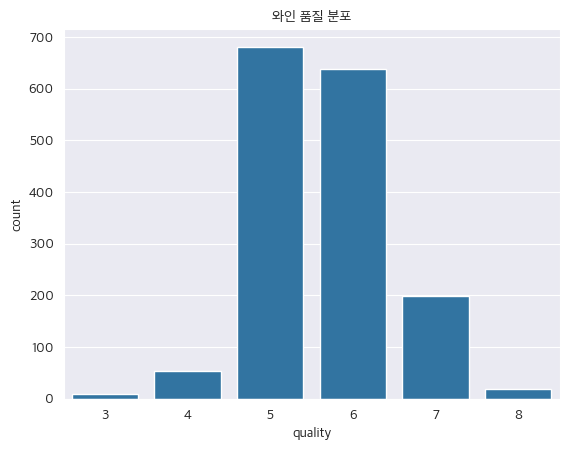

In [2]:

import ssl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.font_manager as fm

# SSL 인증서 무시
ssl._create_default_https_context = ssl._create_unverified_context

# 데이터셋 다운로드 및 로드
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, delimiter=";")

# 데이터 확인
print(df.head())
print(df.info())



# 폰트 경로 설정
# font_path = "C:/Windows/Fonts/NanumGothic.ttf"
font_path= "/System/Library/Fonts/AppleSDGothicNeo.ttc"
font_prop = fm.FontProperties(fname=font_path)

# Matplotlib 기본 폰트 설정
plt.rc('font', family=font_prop.get_name())

# 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 품질 분포 확인
sns.countplot(x=df["quality"])
plt.title("와인 품질 분포",fontproperties=font_prop)
plt.show()


In [3]:
# 품질 점수를 이진 분류 라벨(0: 나쁜 와인, 1: 좋은 와인)로 변환
df["quality_label"] = (df["quality"] >= 6).astype(int)

# 독립 변수(X)와 종속 변수(y) 정의
X = df.drop(columns=["quality", "quality_label"])  # 독립 변수 (11개)
y = df["quality_label"]  # 종속 변수 (0 또는 1)

# 데이터 분할 (훈련 80%, 테스트 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 정규화 (스케일링)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


모델 정확도: 0.74


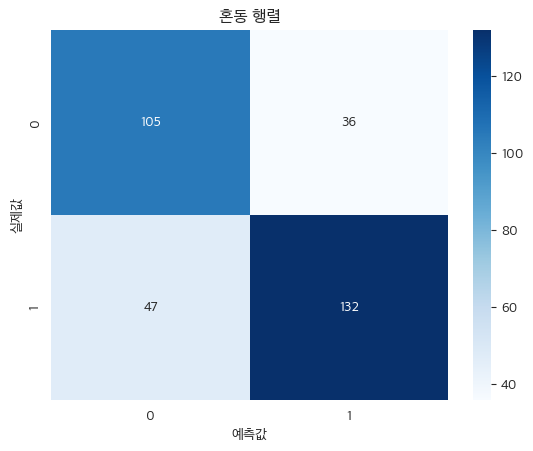

              precision    recall  f1-score   support

           0       0.69      0.74      0.72       141
           1       0.79      0.74      0.76       179

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320



In [4]:
# 로지스틱 회귀 모델 학습
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# 예측 수행
y_pred = model.predict(X_test_scaled)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"모델 정확도: {accuracy:.2f}")

# 혼동 행렬 시각화
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("예측값")
plt.ylabel("실제값")
plt.title("혼동 행렬")
plt.show()

# 분류 보고서 출력
print(classification_report(y_test, y_pred))


In [5]:
# 샘플 데이터 3개 생성 (기존 데이터의 평균과 표준편차를 활용하여 생성)
sample_data = pd.DataFrame(
    [
        [7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4],   # 예제 1
        [6.3, 0.3, 0.4, 1.5, 0.050, 14.0, 22.0, 0.9932, 3.32, 0.49, 10.0],   # 예제 2
        [8.1, 0.4, 0.4, 2.0, 0.080, 6.0, 30.0, 0.9962, 3.30, 0.62, 11.0]    # 예제 3
    ],
    columns=X.columns  # 원래 학습 데이터와 동일한 열 이름 사용
)

# 스케일링 적용 (훈련 데이터와 같은 방식으로 변환)
sample_data_scaled = scaler.transform(sample_data)

# 예측 수행
sample_predictions = model.predict(sample_data_scaled)
sample_probabilities = model.predict_proba(sample_data_scaled)[:, 1]  # 좋은 와인(1)일 확률

# 결과 출력
for i, (pred, prob) in enumerate(zip(sample_predictions, sample_probabilities)):
    print(f"샘플 {i+1}: 예측 결과 = {'좋은 와인(1)' if pred == 1 else '나쁜 와인(0)'} (확률: {prob:.2f})")


샘플 1: 예측 결과 = 나쁜 와인(0) (확률: 0.22)
샘플 2: 예측 결과 = 좋은 와인(1) (확률: 0.58)
샘플 3: 예측 결과 = 좋은 와인(1) (확률: 0.71)
